# Project: Investigate a TMDB Movies Dataset

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#quest">Asking Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# I. Introduction

> In this project, we'll be analyzing a **Movies TMDB Dataset**. This dataset includes some data of 10571 movies such as the popularity, production budget, revenue, genres, cast, and director. We'll start with asking some questions around the movies dataset, then make an investigation to explore and conclude interesting relations. 	     
>
> Next are the questions brainstorming around the data.

<a id='quest'></a>
# II. Asking Questions

> 1. **Can we have a look on general correlations for this analysis process and for further future analyses?**
> 
> 2. **Which genres are most popular?**
>
> 3. **How movies' popularity changes over years as per our sample?**
> 
> 4. **How movies' revenues change over years as per our sample?**
> 
> 5. **How movies' budgets change over years as per our sample?**
> 
> 6. **Are the highest and lowest revenues related with popularity, runtime?**

<a id='wrangling'></a>
# III. Data Wrangling

## 1. General Properties

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

display(HTML('<style>{}</style>'.format(CSS)))

In [3]:
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
old_shape = df.shape
old_shape

(10866, 21)

## 2. Data Cleaning

* As the dataset has a lot of columns that are not useful for this analysis and others are repeated, we'll keep only the most important columns.

In [8]:
df.head(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [9]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
df.drop([
    'id', 'imdb_id', 'budget', 'revenue', 'cast',
    'homepage', 'director', 'tagline', 'keywords',
    'overview', 'production_companies', 'release_date'
], axis=1, inplace=True)

* To improve quality of analysis, we can rename some columns too.

In [11]:
df.rename(columns={'original_title': 'title', 'budget_adj': 'budget', 'revenue_adj': 'revenue'}, inplace=True)

In [12]:
df.columns

Index(['popularity', 'title', 'runtime', 'genres', 'vote_count',
       'vote_average', 'release_year', 'budget', 'revenue'],
      dtype='object')

- Removing null values and duplicates

In [13]:
df.isnull().sum()

popularity       0
title            0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget           0
revenue          0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum().any()

False

In [16]:
df.duplicated().sum()

1

In [17]:
df.drop_duplicates(inplace=True)

- Checking duplicated movies' titles to remove

In [18]:
df.title.nunique(), df.title.duplicated().sum()

(10548, 294)

In [19]:
df.drop_duplicates('title', inplace=True)

In [20]:
df.title.nunique(), df.title.duplicated().sum()

(10548, 0)

In [21]:
df.shape

(10548, 9)

- Checking and fixing datatypes

In [22]:
df.dtypes

popularity      float64
title            object
runtime           int64
genres           object
vote_count        int64
vote_average    float64
release_year      int64
budget          float64
revenue         float64
dtype: object

In [23]:
df.popularity.describe()

count    10548.000000
mean         0.649027
std          1.008401
min          0.000065
25%          0.207371
50%          0.384765
75%          0.715897
max         32.985763
Name: popularity, dtype: float64

In [24]:
df.popularity.value_counts()

0.211695    2
0.430191    2
0.210766    2
0.126182    2
0.071830    2
           ..
0.604152    1
0.601594    1
0.598246    1
0.597095    1
0.035919    1
Name: popularity, Length: 10500, dtype: int64

- *Here we can see that each popularity value occurs at most 2 times across the samples. And we can see that the maximum value "32.985763" is very far from other statistics summary values. Thus the extremely high values that can stand as outliers and* **limit**  *our analysis process can be dropped to let us get better analysis results and correlations.*  

In [25]:
df.popularity.value_counts().max()

2

,Sorted Popularities
1,32.985763
2,28.419936
3,24.949134
4,14.311205
5,13.112507
6,12.971027
7,12.037933
8,11.422751
9,11.173104
10,10.739009


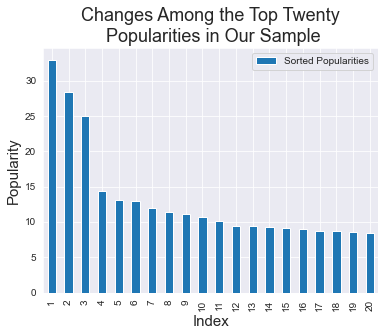

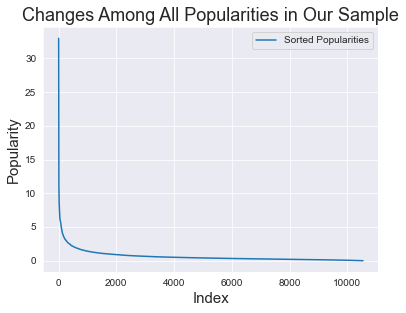

In [26]:
pop = sorted(df.popularity.values, reverse=True)
pop_df = pd.DataFrame(pop, index=range(1,len(pop)+1),columns=['Sorted Popularities'])
pop_df[:20].plot(kind='bar',figsize=(6,4.5))
plt.title('Changes Among the Top Twenty\n Popularities in Our Sample', fontsize=18)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Popularity', fontsize=15); 
pop_df.plot(figsize=(6,4.5))
plt.title('Changes Among All Popularities in Our Sample', fontsize=18)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Popularity', fontsize=15);
pop_df.head(11)

+ **This shows us how the change is very slide in these few values while all other values in the sample are very far from them**

In [27]:
print(
'Samples with popularity >= 5 represent only {} rows, but samples with popularity < 5 represent {} rows.'
    .format(df.query('popularity >= 5').count()[0],
      df.query('popularity < 5').count()[0])
)

Samples with popularity >= 5 represent only 84 rows, but samples with popularity < 5 represent 10464 rows.


In [28]:
df.popularity[df.popularity == df.popularity.max()].value_counts()

32.985763    1
Name: popularity, dtype: int64

+ **Upon this previous investigation, I have decided to drop, from our dataftame, the 84 rows (samples) corresponding to these popularities that are more than or equal to 5.**

In [29]:
df.shape

(10548, 9)

In [30]:
pop_to_remove = df.query('popularity >= 5').index

In [31]:
df.drop(pop_to_remove, inplace=True)

In [32]:
df.popularity.describe()

count    10464.000000
mean         0.590540
std          0.657371
min          0.000065
25%          0.206446
50%          0.382126
75%          0.702224
max          4.983782
Name: popularity, dtype: float64

In [33]:
df.shape

(10464, 9)

In [34]:
df.genres.value_counts()

Comedy                                      703
Drama                                       692
Documentary                                 309
Comedy|Drama                                279
Drama|Romance                               278
                                           ... 
Action|Adventure|Science Fiction|Romance      1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Action|Crime|Drama|Romance                    1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 1978, dtype: int64

* Keeping the first film genre in each genre cell and considering it the main genre upon which we can count

In [35]:
df.genres = df.genres.apply(lambda x: x.split('|')[0])

In [36]:
df.genres.value_counts()

Drama              2368
Comedy             2285
Action             1514
Horror              869
Adventure           546
Thriller            479
Documentary         428
Animation           395
Crime               365
Fantasy             261
Science Fiction     199
Romance             180
Family              138
Mystery             118
Music                98
TV Movie             73
War                  55
History              43
Western              41
Foreign               9
Name: genres, dtype: int64

In [37]:
df.head(10)

,popularity,title,runtime,genres,vote_count,vote_average,release_year,budget,revenue
22,4.907832,San Andreas,114,Action,2060,6.1,2015,1.012000e+08,4.328514e+08
23,4.710402,Fifty Shades of Grey,125,Drama,1865,5.3,2015,3.679998e+07,5.240791e+08
24,4.648046,The Big Short,130,Comedy,1545,7.3,2015,2.575999e+07,1.226787e+08
25,4.566713,Mission: Impossible - Rogue Nation,131,Action,2349,7.1,2015,1.379999e+08,6.277435e+08
26,4.564549,Ted 2,115,Comedy,1666,6.3,2015,6.255997e+07,1.985944e+08
27,4.503789,Kingsman: The Secret Service,130,Crime,3833,7.6,2015,7.451997e+07,3.714978e+08
28,4.062293,Spotlight,128,Drama,1559,7.8,2015,1.839999e+07,8.127872e+07
29,3.968891,Maze Runner: The Scorch Trials,132,Action,1849,6.4,2015,5.611998e+07,2.863562e+08
30,3.927333,Mr. Holmes,103,Mystery,425,6.4,2015,0.000000e+00,2.700677e+07
31,3.899557,Chappie,120,Crime,1990,6.6,2015,4.507998e+07,9.390369e+07


In [38]:
df.reset_index(drop=True, inplace=True)

In [39]:
df.head(10)

,popularity,title,runtime,genres,vote_count,vote_average,release_year,budget,revenue
0,4.907832,San Andreas,114,Action,2060,6.1,2015,1.012000e+08,4.328514e+08
1,4.710402,Fifty Shades of Grey,125,Drama,1865,5.3,2015,3.679998e+07,5.240791e+08
2,4.648046,The Big Short,130,Comedy,1545,7.3,2015,2.575999e+07,1.226787e+08
3,4.566713,Mission: Impossible - Rogue Nation,131,Action,2349,7.1,2015,1.379999e+08,6.277435e+08
4,4.564549,Ted 2,115,Comedy,1666,6.3,2015,6.255997e+07,1.985944e+08
5,4.503789,Kingsman: The Secret Service,130,Crime,3833,7.6,2015,7.451997e+07,3.714978e+08
6,4.062293,Spotlight,128,Drama,1559,7.8,2015,1.839999e+07,8.127872e+07
7,3.968891,Maze Runner: The Scorch Trials,132,Action,1849,6.4,2015,5.611998e+07,2.863562e+08
8,3.927333,Mr. Holmes,103,Mystery,425,6.4,2015,0.000000e+00,2.700677e+07
9,3.899557,Chappie,120,Crime,1990,6.6,2015,4.507998e+07,9.390369e+07


In [40]:
last_shape = df.shape
last_shape

(10464, 9)

In [41]:
old_shape, last_shape

((10866, 21), (10464, 9))

<a id='eda'></a>
# IV. Exploratory Data Analysis

## 1. Can we have a look on general correlations for this analysis process and for further future analyses?

In [42]:
df

,popularity,title,runtime,genres,vote_count,vote_average,release_year,budget,revenue
0,4.907832,San Andreas,114,Action,2060,6.1,2015,1.012000e+08,4.328514e+08
1,4.710402,Fifty Shades of Grey,125,Drama,1865,5.3,2015,3.679998e+07,5.240791e+08
2,4.648046,The Big Short,130,Comedy,1545,7.3,2015,2.575999e+07,1.226787e+08
3,4.566713,Mission: Impossible - Rogue Nation,131,Action,2349,7.1,2015,1.379999e+08,6.277435e+08
4,4.564549,Ted 2,115,Comedy,1666,6.3,2015,6.255997e+07,1.985944e+08
...,...,...,...,...,...,...,...,...,...
10459,0.080598,The Endless Summer,95,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00
10460,0.065543,Grand Prix,176,Action,20,5.7,1966,0.000000e+00,0.000000e+00
10461,0.065141,Beregis Avtomobilya,94,Mystery,11,6.5,1966,0.000000e+00,0.000000e+00
10462,0.064317,"What's Up, Tiger Lily?",80,Action,22,5.4,1966,0.000000e+00,0.000000e+00


                                        Matrix of Correlations between Columns

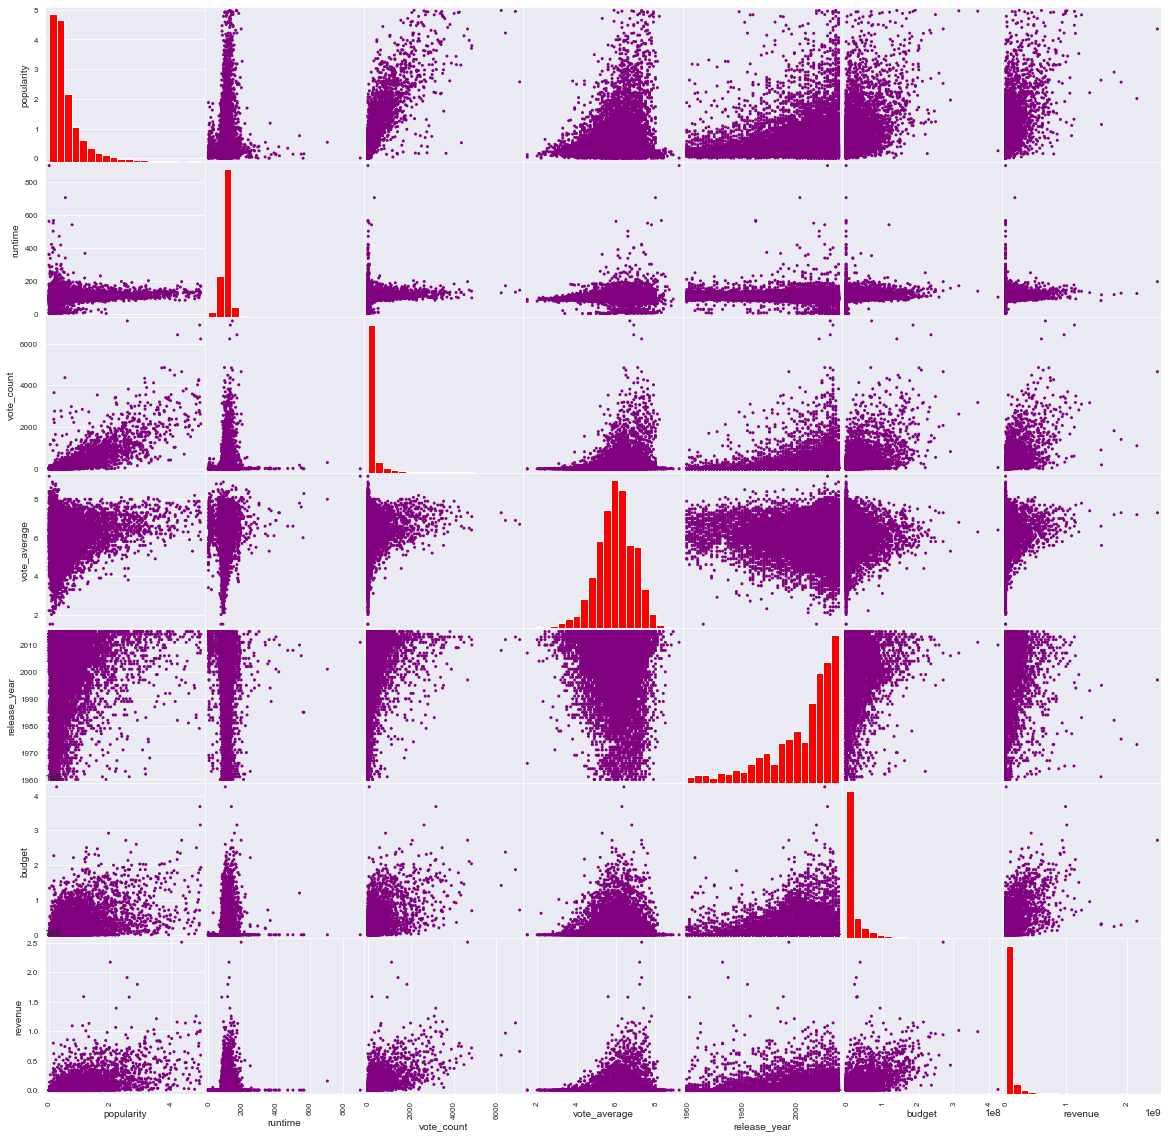

In [43]:
pd.plotting.scatter_matrix(df, color='purple', hist_kwds={'bins':20, 'color':'red'}, alpha=1, figsize=(20,20));

## 2. Which genres are most popular?

+ At first, let's check the distribution of movies in our sample on the different genres

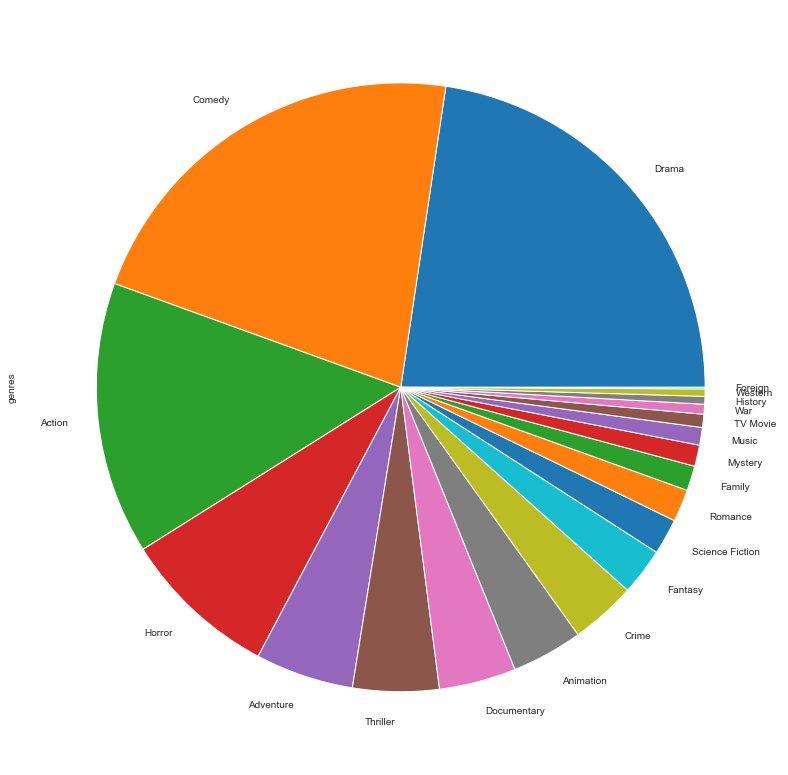

In [44]:
df.genres.value_counts().plot(kind='pie', figsize=(14,14));

+ Oh! Drama, Comedy, Action, Horror, and Adventure Films are on the top **quantitatively**.

In [45]:
df.popularity.describe()

count    10464.000000
mean         0.590540
std          0.657371
min          0.000065
25%          0.206446
50%          0.382126
75%          0.702224
max          4.983782
Name: popularity, dtype: float64

In [46]:
a = df.query('popularity > popularity.mean()')['title'].count()
a

3246

In [47]:
b = df.query('popularity < popularity.mean()')['title'].count()
b

7218

In [48]:
print(
'So, in our sample, the number of movies with popularity more than the average is {},\n\
while the number of movies with popularity less than the average is {}'.format(a, b)
) 

So, in our sample, the number of movies with popularity more than the average is 3246,
while the number of movies with popularity less than the average is 7218


+ Now let's get the mean popularity for each film genre

In [49]:
mean_pop_per_genre = df.groupby('genres').popularity.mean()
gen_df = mean_pop_per_genre.to_frame(name='Mean Popularity').reset_index().rename(columns={'genres': 'Movie Genre'})
gen_df.head()

,Movie Genre,Mean Popularity
0,Action,0.691308
1,Adventure,0.993720
2,Animation,0.776200
3,Comedy,0.528738
4,Crime,0.657713


In [50]:
gen_df['Movie Genre'][gen_df['Mean Popularity'] == gen_df['Mean Popularity'].max()]

1    Adventure
Name: Movie Genre, dtype: object

,Movie Genre,Mean Popularity
0,Action,0.691308
1,Adventure,0.993720
2,Animation,0.776200
3,Comedy,0.528738
4,Crime,0.657713
5,Documentary,0.175856
6,Drama,0.525831
7,Family,0.645166
8,Fantasy,0.794567
9,Foreign,0.167124


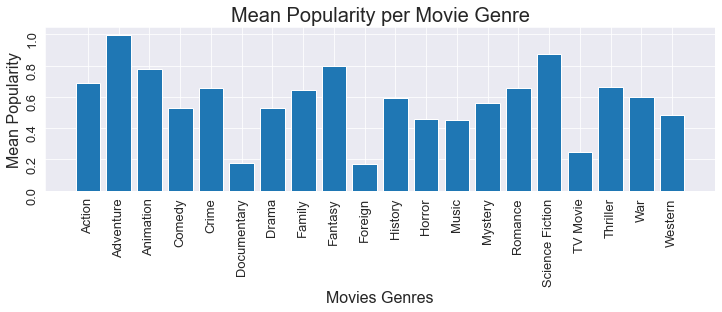

In [51]:
f, ax = plt.subplots(figsize=(12,3))
plt.bar(gen_df['Movie Genre'], gen_df['Mean Popularity'])
ax.set_title('Mean Popularity per Movie Genre', fontsize=20)
ax.set_xlabel('Movies Genres', fontsize=16)
ax.set_ylabel('Mean Popularity', fontsize=16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_rotation(90)
    label.set_fontsize(13);
gen_df.head(10)

+ **Here we can find that Adventure Movies are the most popular in our sample.**

## 3. How movies' popularity changes over years as per our sample?

In [52]:
mean_popularity_year = df.groupby('release_year').popularity.mean()

,Release Year,Popularity
0,1960,0.368835
1,1961,0.442715
2,1962,0.430630
3,1963,0.510663
4,1964,0.415003
5,1965,0.314955
6,1966,0.311006
7,1967,0.380738
8,1968,0.450295
9,1969,0.426495


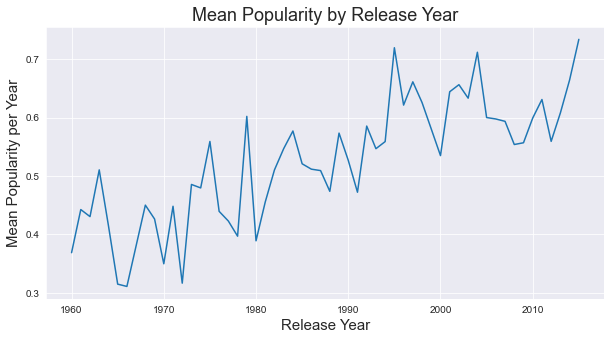

In [53]:
f, ax = plt.subplots(figsize=(10,5))
plt.plot(mean_popularity_year.index, mean_popularity_year)
plt.title('Mean Popularity by Release Year', fontsize=18)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Mean Popularity per Year', fontsize=15);
mean_popularity_year.to_frame(name='Popularity').reset_index().rename(columns={'release_year': 'Release Year'}).head(10)

+ **The popularity of movies increases over years. Is this because of the continuous progress in this industry over years?**
  *Seems reasonable.*  

## 4. How movies' revenues change over years as per our sample?

In [54]:
df.revenue.describe()

count    1.046400e+04
mean     4.651543e+07
std      1.257927e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.172972e+07
max      2.506406e+09
Name: revenue, dtype: float64

In [55]:
mean_revenues_year = df.groupby('release_year').revenue.mean()

,Release Year,Revenues
0,1960,0.368835
1,1961,0.442715
2,1962,0.430630
3,1963,0.510663
4,1964,0.415003
5,1965,0.314955
6,1966,0.311006
7,1967,0.380738
8,1968,0.450295
9,1969,0.426495


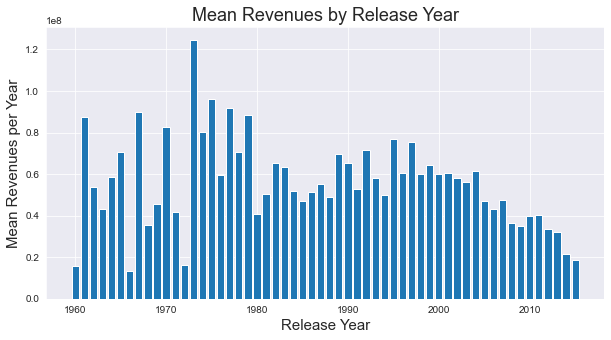

In [56]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(mean_revenues_year.index, mean_revenues_year)
plt.title('Mean Revenues by Release Year', fontsize=18)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Mean Revenues per Year', fontsize=15);
mean_popularity_year.to_frame(name='Revenues').reset_index().rename(columns={'release_year': 'Release Year'}).head(10)

In [57]:
# df.groupby('release_year').revenue.mean()
years = ['Before 90\'s', 'After 90\'s']
years

["Before 90's", "After 90's"]

In [58]:
low = df['revenue'][df['release_year'] < 1990].mean()
high = df['revenue'][df['release_year'] > 1990].mean()
heights_rev = [low, high]
heights_rev

[59664687.12689339, 43493525.97466354]

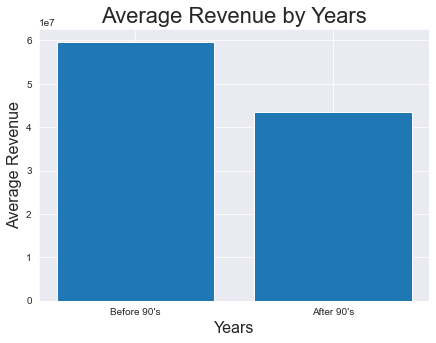

In [59]:
f, ax = plt.subplots(figsize=(7,5))
plt.bar([1,2], heights_rev, tick_label=years)
plt.title('Average Revenue by Years', fontsize=22)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Average Revenue', fontsize=16);

+ I think revenues were higher in the past but they were not stable showing big decreases in some years and big increases in others. This all was before 90's, and then they showed less changes upwards, and then decreased semi-regularly from 2000 to 2015.   

## 5. How movies' budgets change over years as per our sample?

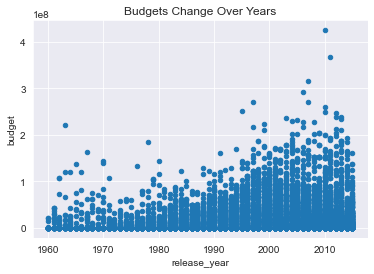

In [62]:
df.plot(x='release_year', y='budget', kind='scatter', title='Budgets Change Over Years');

+ Also reasonable increase in movies budgets over years with the increasing progress in the cinema industry 

## 6. Are the highest and lowest revenues related with popularity, runtime?

In [64]:
a = df[['popularity', 'runtime']][df.revenue == df.revenue.max()].mean()
aa = a.to_frame(name='The Highest Revenue').set_index(pd.Index(['mean popularity', 'mean runtime']))
aa

,The Highest Revenue
mean popularity,4.355219
mean runtime,194.000000


In [65]:
b = df[['popularity', 'runtime']][df.revenue == df.revenue.min()].mean()
bb = b.to_frame(name='The Lowest Revenue').set_index(pd.Index(['mean popularity', 'mean runtime']))
bb

,The Lowest Revenue
mean popularity,0.322870
mean runtime,97.029038


,mean popularity
The Highest Revenue,4.355219
The Lowest Revenue,0.322870


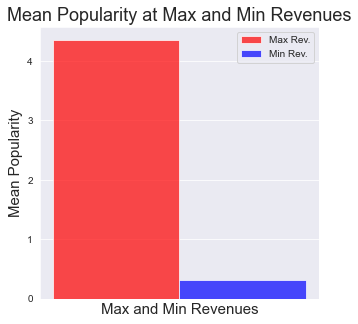

In [66]:
# plot bars
f, ax = plt.subplots(figsize=(5,5))
max_r = plt.bar([1], a[0], 0.35, color='red', alpha=.7, label='Max Rev.')
min_r = plt.bar([1.35], b[0], 0.35, color='blue', alpha=.7, label='Min Rev.')
# title and labels
plt.xlabel('Max and Min Revenues', fontsize=15)
plt.ylabel('Mean Popularity', fontsize=15)
plt.title('Mean Popularity at Max and Min Revenues',fontsize=18)
plt.xticks([],'')

# legend
plt.legend();
pd.concat([aa[:][0:1], bb[:][0:1]], axis=1).transpose()

,mean runtime
The Highest Revenue,194.000000
The Lowest Revenue,97.029038


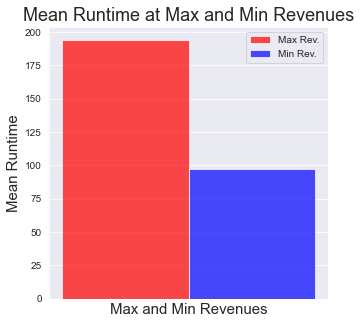

In [67]:
# plot bars
f, ax = plt.subplots(figsize=(5,5))
max_r = plt.bar([1], a[1], 0.35, color='red', alpha=.7, label='Max Rev.')
min_r = plt.bar([1.35], b[1], 0.35, color='blue', alpha=.7, label='Min Rev.')
# title and labels
plt.xlabel('Max and Min Revenues', fontsize=15)
plt.ylabel('Mean Runtime', fontsize=15)
plt.title('Mean Runtime at Max and Min Revenues',fontsize=18)
plt.xticks([],'')

# legend
plt.legend();
pd.concat([aa[:][1:], bb[:][1:]], axis=1).transpose()

+ Maximum revenues stick with higher mean popularity and higher mean runtime

<a id='conclusions'></a>
# V. Conclusions

10866, 21), (10464, 9
Before cleaning, the dataset started with 10866 samples and 21 columns having a lot of rows columns repetitions. There were extra budget and revenues columns, for eaxmple and there were 294 duplications in samples found in the movies title column. After cleaning, 10464 samples remain and 9 columns are available to do our analysis. I think these samples are a good representative of the population and the removed rows or columns don't affect our work negatively.
There was a **limitation** here: 
>mean popularity = 0.649027, its min = 0.000065, its median = 0.384765, and the max value is 32.985763; that the popularity maximum value is extremely larger than its average and its all other statistical summary values. This seems to be caused by outliers. I handled this issue in cleaning by removing these outliers.

### The most important findings I've got, as per each question asked at the begining, are as follows:

### 1. Can we have a look on general correlations for this analysis process and for further future analyses?
Done inplace. Please check.

### 2. Which genres are most popular?
Drama, Comedy, Action, Horror, and Adventure Films are on the top **quantitatively**.
In our sample, the number of movies with popularity more than the average is 3246, while the number of movies with popularity less than the average is 7218
Adventure Movies are the most popular in our sample.

### 3. How movies' popularity changes over years as per our sample?
**The popularity of movies increases over years. Is this because of the continuous progress in this industry over years?** 
*Seems reasonable.*  

### 4. How movies' revenues change over years as per our sample?
I can see from the plot that revenues were higher in the past but they were not stable showing sudden drops in some years. This all was before 90's, and then they showed less changes upwards, and then decreased semi-regularly from 2000 to 2015.   

### 5. How movies' budgets change over years as per our sample?
Also reasonable increase in movies budgets over years with the increasing progress in the cinema industry. 

### 6. Are the highest and lowest revenues related with popularity, runtime?
Maximum revenues stick with higher mean popularity and higher mean runtime.

Hope my work be useful and satisfying.